In [1]:
import pandas as pd 
path = '../datasets/'
column_names = [0 for i in range (785)]
column_names[0] ='class'

for i in range (1,785):
    column_names[i] ="pixel"+ str(i)
df_train = pd.read_csv(path + 'mnist_train.csv', header = None, names = column_names)
df_test = pd.read_csv(path + 'mnist_test.csv', header = None, names = column_names)
  
print(df_train.shape)
df_train.head(10)

(60000, 785)


,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print("Train:")
print(df_train.info())
print("Test:")
print(df_test.info())

Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
Test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, class to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


In [4]:
(df_train["class"].value_counts(normalize=True) * 100).sort_index()

class
0     9.871667
1    11.236667
2     9.930000
3    10.218333
4     9.736667
5     9.035000
6     9.863333
7    10.441667
8     9.751667
9     9.915000
Name: proportion, dtype: float64

In [5]:
classes = df_train.groupby('class').size() # df_train["class"].value_counts()
classes

class
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

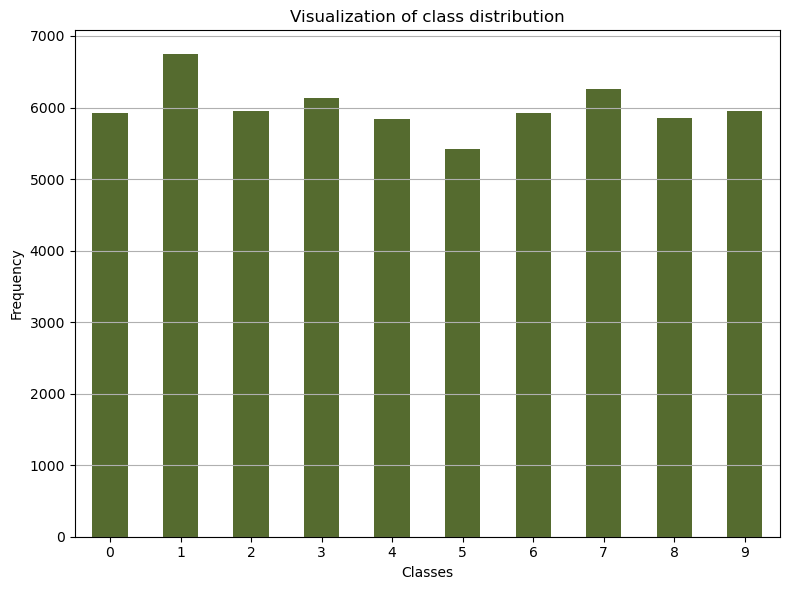

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 6))
classes.plot(kind='bar', color='darkolivegreen')
plt.title('Visualization of class distribution')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
print(df_train.shape[1])
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0] 
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0] 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_train.shape)
y_train.head()

785
(60000, 784) (60000,)
(10000, 784) (60000,)


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

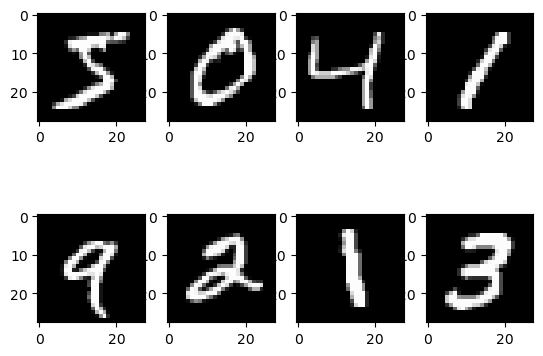

In [9]:
for i in range(8):
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_train.iloc[i,:]
    ith_image_arr = ith_image.to_numpy() 
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))

plt.show()

## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy', 'gini'],
    'max_depth': [5, 10, 15],
}

tree_classifier = DecisionTreeClassifier()

# GridSearch
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 15}
Best Score: 0.8733166666666667


In [13]:
%time
predictions_DT = grid_search.predict(X_test)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 15 µs


In [15]:
print('Accuracy:', accuracy_score(y_test, predictions_DT))
print(confusion_matrix(y_test, predictions_DT))

Accuracy: 0.8885
[[ 917    1    7    5    3   16    9    6    7    9]
 [   0 1102    7    4    1    8    0    3    6    4]
 [   8    3  909   19   11   14   23   20   23    2]
 [   6    6   27  861    4   41    6   17   26   16]
 [   7    3   11    8  859    9   14    6   22   43]
 [  13    4    9   36    8  763   16    4   23   16]
 [  15    4   15    5   21   15  865    4   10    4]
 [   2   10   34   14   12    4    4  924    5   19]
 [   7    8   19   29   22   21   14   10  817   27]
 [   6    5   10   18   38   22    4   13   25  868]]


## Random Forest

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 15],
    'n_estimators': [100, 150]
}

r_forest = RandomForestClassifier()

# GridSearch
grid_search_rf = GridSearchCV(r_forest, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

Best Parameters: {'criterion': 'log_loss', 'max_depth': 15, 'n_estimators': 150}
Best Score: 0.9653333333333334
CPU times: user 1min 48s, sys: 3.2 s, total: 1min 51s
Wall time: 16min 7s


In [18]:
%time
predictions_RF = grid_search_rf.predict(X_test)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 13.1 µs


In [19]:
print('Accuracy:', accuracy_score(y_test, predictions_RF))
print(confusion_matrix(y_test, predictions_RF))

Accuracy: 0.9681
[[ 969    1    0    0    0    3    3    1    2    1]
 [   0 1123    3    2    0    2    3    1    1    0]
 [   6    0  998    5    3    0    5    9    6    0]
 [   0    0   11  970    0   10    0    8    9    2]
 [   1    0    1    0  949    0    7    0    2   22]
 [   2    0    0   13    2  860    6    2    5    2]
 [   8    3    2    0    4    2  936    0    3    0]
 [   1    5   22    1    1    0    0  982    3   13]
 [   5    0    3    6    5    4    5    4  934    8]
 [   4    5    2   13   11    4    1    5    4  960]]


## Extra Tree

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

extra_tree = ExtraTreesClassifier(n_estimators=150, criterion='gini', max_depth=10, n_jobs=-1)

extra_tree.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=10, n_estimators=150, n_jobs=-1)

In [21]:
%time
predictions_ET = extra_tree.predict(X_test)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 16.9 µs


In [22]:
print('Accuracy:', accuracy_score(y_test, predictions_ET))
print(confusion_matrix(y_test, predictions_ET))

Accuracy: 0.9418
[[ 966    1    0    0    0    3    6    1    2    1]
 [   0 1121    3    4    0    1    3    1    2    0]
 [   9    1  956    9   12    0   10   20   11    4]
 [   3    1   16  944    2   15    0   14    9    6]
 [   1    3    3    0  913    1    7    3    5   46]
 [   7    7    2   23    4  819   12    5    6    7]
 [  10    3    0    0    8    5  930    0    2    0]
 [   2   17   28    1    5    0    0  941    5   29]
 [   4    4    4   14    7    8    9    6  893   25]
 [   9    7    2   13   16    4    3   10   10  935]]


## xgboost

In [26]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(max_depth=10, n_estimators = 20, criterion ='entropy')
model_xgb.fit(X_train, y_train)

[15:24:47] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "criterion" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='entropy',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', ...)

In [27]:
%time
xgb_preds = model_xgb.predict(X_test)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 16.2 µs


In [28]:
print('Accuracy:', accuracy_score(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))

Accuracy: 0.9655
[[ 966    0    0    1    0    2    4    2    4    1]
 [   1 1122    4    2    0    0    3    1    2    0]
 [   4    0  991   10    6    0    3    8    9    1]
 [   1    0    9  970    1    7    1    9    8    4]
 [   0    0    3    1  944    0    4    0    6   24]
 [   3    1    1   12    0  849   11    4    7    4]
 [   6    2    1    0    4    4  936    0    5    0]
 [   2    5   21    2    1    1    0  980    3   13]
 [   1    1    5    5    3    5    8    3  936    7]
 [   6    5    3    6   12    5    0    4    7  961]]
